# Generating Mizar and Pleiades spectra and basic photometry
Used to normalise the outputs of the Tinytol simulations to give units of photons per pixel per frame

In [15]:
import numpy as np
import matplotlib 
import matplotlib as mpl
from astropy.table import Table 
from cycler import cycler

%pylab inline --no-import-all

matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(6.0,4.0)  #(12.0,9.0)    
matplotlib.rcParams['font.size']=10              #18 
matplotlib.rcParams['savefig.dpi']= 72             #300
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['savefig.facecolor']='white'
# mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')


import pysynphot as S

import specutils
from astropy.io import fits as pyfits
from astropy.wcs import WCS
from astropy.io import fits
from scipy.ndimage.filters import gaussian_filter1d

Populating the interactive namespace from numpy and matplotlib


In [16]:
def custom_bandpass(wl, pass_range, value):
    """
    Outputs a scaled custom binary bandpass
    """
    bandpass = []
    for wave in wl:
        if wave >= pass_range[0] and wave <= pass_range[1]:
            bandpass.append(value)
        else:
            bandpass.append(0)
    return bandpass

In [17]:
# Sets our collecting area
r = 1 # cm
tinytol_area = np.pi*r**2
S.refs.setref(area=tinytol_area)  # cm2

In [18]:
image_path = "Images/"

## Ursae Majoris

In [74]:
# Metalicity taken as 0.015 ~ solar for all

nwavels = 3501
wavels = np.linspace(3500,7000,nwavels)
Ustars = []


MizarA  = S.Icat('phoenix',9340,0.015,3.88)
# logg
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2009A%26A...501..297Z
# Temp 
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2009A%26A...501..297Z
specMA = MizarA.sample(wavels)
Ustars.append([MizarA,specMA,"MizarA",2.23])
# mags
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2002A%26A...384..180F

MizarB  = S.Icat('phoenix',8280,0.015,3.88)
# Temp 
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2012A%26A...537A.120Z
# logg
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2009A%26A...501..297Z
specMB = MizarB.sample(wavels)
Ustars.append([MizarB,specMB,"MizarB",3.88])
# mags
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2002A%26A...384..180F


Alcor  = S.Icat('phoenix',7955,0.015,3.88)
# temp and logg
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2003AJ....126.2048G
specA = Alcor.sample(wavels)
Ustars.append([Alcor,specA,"AlcorA",4.01])
# mags
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=1993A%26AS..100..591O


print("Flux units are {}".format(MizarA.fluxunits))
print("Wavelength units are {}".format(MizarA.waveunits))

Flux units are flam
Wavelength units are angstrom


In [75]:
TP = custom_bandpass(wavels, [3500,7000], 1)

for star in Ustars:
    star_obj = star[0]
    spectra = star[1]
    name = star[2]
    mag = star[3]
    
    band = S.ArrayBandpass(wavels, TP)
    normed = star_obj.renorm(mag,'vegamag',band)
    obs = S.Observation(normed,band,binset=wavels)
    
    star.append(normed)
    star.append(obs)

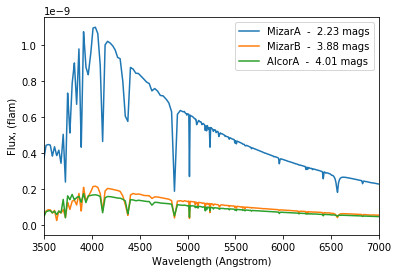

In [79]:
for star in Ustars:
    obs = star[5]
    label = star[2] + "  -  " + str(star[3]) + " mags"
    plt.plot(obs.wave,obs.flux,label=label)
#     print(obs.fluxunits)
    
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux, (flam)')
plt.legend()
plt.xlim(3500,7000)

# plt.title(' spectrum')
# plt.savefig(image_path + "Ursa_spec.jpg", bbox_inches='tight')

plt.show()

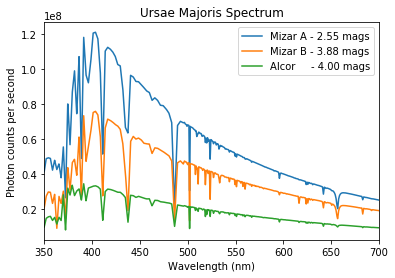

In [80]:
plt.plot(wavels/10.,specMA,label="Mizar A - 2.55 mags")
plt.plot(wavels/10.,specMB,label="Mizar B - 3.88 mags")
plt.plot(wavels/10.,specA,label="Alcor     - 4.00 mags")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Photon counts per second')
plt.xlim(350,700)
plt.legend()
plt.title('Ursae Majoris Spectrum')
# plt.savefig(image_path + "Ursa_spec.jpg", bbox_inches='tight')
plt.show()

## Pleiades

In [81]:
# Metalicity taken as 0.015 ~ solar for all

Pstars = []

nwavels = 3501
wavels = np.linspace(3500,7000,nwavels)

T_25  = S.Icat('phoenix',13490,0.015,4.0) 
# Temp logg
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2001A%26A...378..861C
specT_25 = T_25.sample(wavels)
Pstars.append([T_25,specT_25,"Tauri_25",2.87])
# mags
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2002yCat.2237....0D


T_27  = S.Icat('phoenix',13020,0.015,4.1)
# Only Temp
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2009A%26A...501..297Z
specT_27 = T_27.sample(wavels)
Pstars.append([T_27,specT_27,"Tauri_27",3.62])
# mags
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2002yCat.2237....0D


T_17  = S.Icat('phoenix',14655,0.015,3.03)
# Temp Log G quoted as 3.03??? 
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2001A%26A...378..861C
specT_17 = T_17.sample(wavels)
Pstars.append([T_17,specT_17,"Tauri_17",3.70])
# mags
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2002yCat.2237....0D


T_20  = S.Icat('phoenix',14310,0.015,3.5)
# Temp 
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2009A%26A...501..297Z
# log g 3.5 newest source is 
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=1979ApJS...41..675H
specT_20 = T_20.sample(wavels)
Pstars.append([T_20,specT_20,"Tauri_20",3.87])
# mags
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2002yCat.2237....0D


T_23  = S.Icat('phoenix',14521,0.015,2.92)
# Temp log g 2.92??? Check units maybe?
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2001A%26A...378..861C
specT_23 = T_23.sample(wavels)
Pstars.append([T_23,specT_23,"Tauri_23",4.18])
# mags
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2002yCat.2237....0D


T_19  = S.Icat('phoenix',14180,0.015,4.0)
# Temp
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2009A%26A...501..297Z
specT_19 = T_19.sample(wavels)
Pstars.append([T_19,specT_19,"Tauri_19",4.30])
# mags
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2002yCat.2237....0D


T_28  = S.Icat('phoenix',13366,0.015,3.82)
# Temp and log g
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2001A%26A...378..861C
specT_28 = T_28.sample(wavels)
Pstars.append([T_28,specT_28,"Tauri_28",5.09])
# mags
# http://simbad.u-strasbg.fr/simbad/sim-ref?bibcode=2002yCat.2237....0D


print("Flux units are {}".format(T_25.fluxunits))
print("Flux units are {}".format(T_19.fluxunits))

print("Wavelength units are {}".format(MizarA.waveunits))

Flux units are flam
Flux units are flam
Wavelength units are angstrom


In [82]:
TP = custom_bandpass(wavels, [3500,7000], 1)

for star in Pstars:
    star_obj = star[0]
    spectra = star[1]
    name = star[2]
    mag = star[3]
    
    band = S.ArrayBandpass(wavels, TP)
    normed = star_obj.renorm(mag,'vegamag',band)
    obs = S.Observation(normed,band,binset=wavels)
    
    star.append(normed)
    star.append(obs)

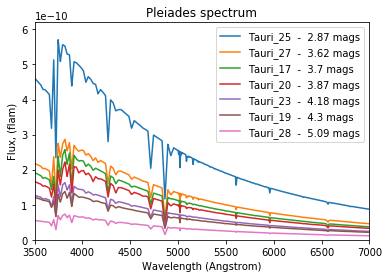

In [83]:
for star in Pstars:
    obs = star[5]
    label = star[2] + "  -  " + str(star[3]) + " mags"
    plt.plot(obs.wave,obs.flux,label=label)
#     print(obs.fluxunits)
    
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux, (flam)')
plt.legend()
plt.xlim(3500,7000)
plt.ylim(0,0.62e-9)

plt.title('Pleiades spectrum')
# plt.savefig(image_path + "Pleiades_spec.jpg", bbox_inches='tight')

plt.show()

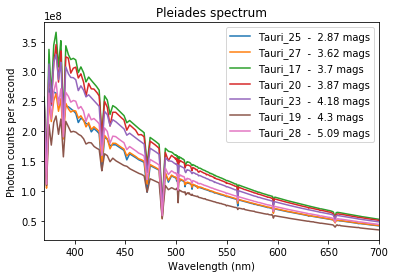

In [84]:
for i in range(len(Pstars)):
    star = Pstars[i]
    label = star[2] + "  -  " + str(star[3]) + " mags"
    plt.plot(wavels/10.,star[1],label=label)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Photon counts per second')
plt.xlim(370,700)

plt.legend()
plt.title('Pleiades spectrum')
#     plt.savefig(image_path + "Pleiades_spec.jpg", bbox_inches='tight')

plt.show()

### Recreate CCD Bayer response

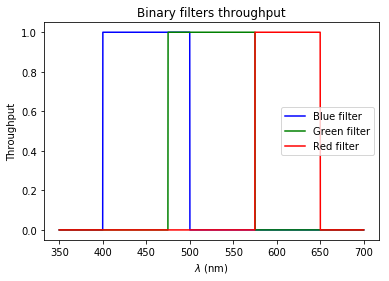

In [25]:
# 50% throughput for green and 25% for red and blue to represent the bayer filter pattern

throughput_r = custom_bandpass(wavels, [5750,6500], 1)
throughput_g = custom_bandpass(wavels, [4750,5750], 1)
throughput_b = custom_bandpass(wavels, [4000,5000], 1)

plt.plot(wavels/10.,throughput_b,label=r'Blue filter',color='b')
plt.plot(wavels/10.,throughput_g,label=r'Green filter',color='g')
plt.plot(wavels/10.,throughput_r,label=r'Red filter',color='r')

plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel('Throughput')
plt.legend()
plt.title("Binary filters throughput")

band_bin_b = S.ArrayBandpass(wavels, throughput_b, name='blue')
band_bin_g = S.ArrayBandpass(wavels, throughput_g, name='green')
band_bin_r = S.ArrayBandpass(wavels, throughput_r, name='red')

In [26]:
for star in Ustars:
    star_obj = star[0]
    spectra = star[1]
    name = star[2]
    mag = star[3]
    
    filtered_r = star_obj.renorm(mag,'vegamag',band_bin_r)
    filtered_g = star_obj.renorm(mag,'vegamag',band_bin_g)
    filtered_b = star_obj.renorm(mag,'vegamag',band_bin_b)
    filtered_spec = (filtered_r,filtered_g,filtered_b)

    obs_bin_r = S.Observation(filtered_r,band_bin_r,binset=wavels)
    obs_bin_g = S.Observation(filtered_g,band_bin_g,binset=wavels)
    obs_bin_b = S.Observation(filtered_b,band_bin_b,binset=wavels)
    observations = (obs_bin_r,obs_bin_g,obs_bin_b)
    
    star.append(filtered_spec)
    star.append(observations)

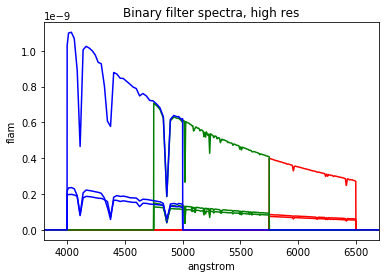

In [27]:
for star in Ustars:
    colours = ['r','g','b']
    for obs,c in zip(star[5],colours):
        plt.plot(obs.wave,obs.flux,label=star[3],color=c) # Angstrom
        plt.xlim(3800,6700)
        plt.title("Binary filter spectra, high res")
        plt.xlabel(obs.waveunits)
        plt.ylabel(obs.fluxunits)

In [28]:
for star in Pstars:
    star_obj = star[0]
    spectra = star[1]
    name = star[2]
    mag = star[3]
    
    filtered_r = star_obj.renorm(mag,'vegamag',band_bin_r)
    filtered_g = star_obj.renorm(mag,'vegamag',band_bin_g)
    filtered_b = star_obj.renorm(mag,'vegamag',band_bin_b)
    filtered_spec = (filtered_r,filtered_g,filtered_b)

    obs_bin_r = S.Observation(filtered_r,band_bin_r,binset=wavels)
    obs_bin_g = S.Observation(filtered_g,band_bin_g,binset=wavels)
    obs_bin_b = S.Observation(filtered_b,band_bin_b,binset=wavels)
    observations = (obs_bin_r,obs_bin_g,obs_bin_b)
    
    star.append(filtered_spec)
    star.append(observations)

AttributeError: 'UniformTransmission' object has no attribute 'flux'

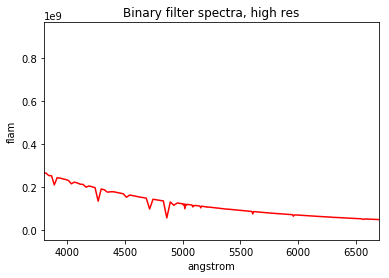

In [29]:
for star in Pstars:
    colours = ['r','g','b']
    for obs,c in zip(star[5],colours):
        plt.plot(obs.wave,obs.flux,label=star[3],color=c) # Angstrom
        plt.xlim(3800,6700)
        plt.title("Binary filter spectra, high res")
        plt.xlabel(obs.waveunits)
        plt.ylabel(obs.fluxunits)

In [ ]:
pix_spread = 300 # Our star is spread out across ~300 pixels
fps = 10
filters = ["Red","Green","Blue"]

total = [0,0,0]

for star in Ustars:
    obs_list = star[5]
    
    rate_cm2 = []
    pix_rate = []
    rate_per_frame = []
    
    for obs,filt in zip(obs_list,filters):
        obs.primary_area = tinytol_area        
        rate_cm2.append(obs.countrate()/obs.primary_area)
        
    print(star[2] + " counts per frame per cm2 - R: {:.0f}  G: {:.0f}  B: {:.0f}".format(rate_cm2[0]/10,rate_cm2[1]/10,rate_cm2[2]/10,))
    
    total[0] += rate_cm2[0]
    total[1] += rate_cm2[1]
    total[2] += rate_cm2[2]
    
print()
print("Total counts per frame per cm2  - R: {:.0f}  G: {:.0f}  B: {:.0f}".format(total[0]/10,total[1]/10,total[2]/10,))  

In [ ]:
pix_spread = 300 # Our star is spread out across ~300 pixels
fps = 10
filters = ["Red","Green","Blue"]

total = [0,0,0]
for star in Pstars:
    obs_list = star[5]
    
    rate_cm2 = []
    pix_rate = []
    rate_per_frame = []
    
    for obs,filt in zip(obs_list,filters):
        obs.primary_area = tinytol_area        
        rate_cm2.append(obs.countrate()/obs.primary_area)
        
    print(star[2] + " counts per frame per cm2 - R: {:.0f}  G: {:.0f}  B: {:.0f}".format(rate_cm2[0]/10,rate_cm2[1]/10,rate_cm2[2]/10,))
    
    total[0] += rate_cm2[0]
    total[1] += rate_cm2[1]
    total[2] += rate_cm2[2]

print()
print("Total counts per frame per cm2   - R: {:.0f}  G: {:.0f}  B: {:.0f}".format(total[0]/10,total[1]/10,total[2]/10,))    

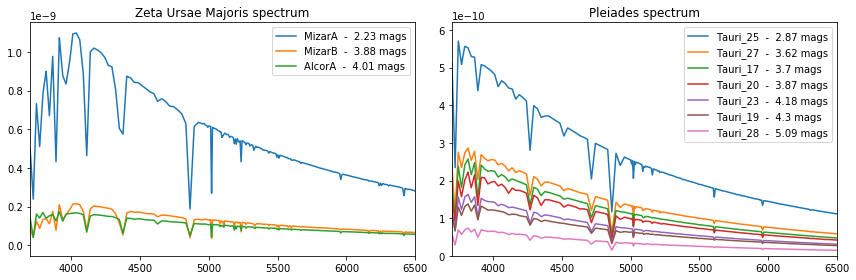

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for star in Ustars:
    obs = star[5]
    label = star[2] + "  -  " + str(star[3]) + " mags"
    ax[0].plot(obs.wave,obs.flux,label=label)
    
# ax[0].xlabel('Wavelength (Angstrom)')
# ax[0].ylabel('Flux, (flam)')
ax[0].legend()
ax[0].set_xlim(3700,6500)
ax[0].set_title('Zeta Ursae Majoris spectrum')




for star in Pstars:
    obs = star[5]
    label = star[2] + "  -  " + str(star[3]) + " mags"
    ax[1].plot(obs.wave,obs.flux,label=label)
    
# ax[1].xlabel('Wavelength (Angstrom)')
# ax[1].ylabel('Flux, (flam)')
ax[1].legend()
ax[1].set_xlim(3700,6500)
ax[1].set_ylim(0,0.62e-9)

ax[1].set_title('Pleiades spectrum')

fig.tight_layout()

# fig.savefig(image_path + "spectrums_grouped.jpg", bbox_inches='tight')

